# Which player has the highest number of wins?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

event_dataframe = pd.DataFrame()
for file in os.listdir("raw/event_parquet"):
    single_stats = pd.read_parquet("raw/event_parquet/" + file)
    event_dataframe = pd.concat([event_dataframe, single_stats], axis= 'rows', ignore_index=True)


In [2]:
# حذف تکراری‌ها از event_dataframe
event_dataframe = event_dataframe.drop_duplicates()

# حذف تکراری‌ها از home_team_dataframe و away_team_dataframe
home_team_dataframe = home_team_dataframe.drop_duplicates()
away_team_dataframe = away_team_dataframe.drop_duplicates()

# بررسی یکتایی ستون match_id در event_dataframe
print(event_dataframe['match_id'].nunique() == len(event_dataframe))

# بررسی یکتایی ستون match_id در home_team_dataframe
print(home_team_dataframe['match_id'].nunique() == len(home_team_dataframe))

# بررسی یکتایی ستون match_id در away_team_dataframe
print(away_team_dataframe['match_id'].nunique() == len(away_team_dataframe))


True
True
True


In [3]:
# فیلتر کردن مسابقات برنده شده توسط تیم خانه (برنده = 1)
home_wins = event_dataframe[event_dataframe['winner_code'] == 1]

# فیلتر کردن مسابقات برنده شده توسط تیم میهمان (برنده = 2)
away_wins = event_dataframe[event_dataframe['winner_code'] == 2]

# استخراج بازیکنانی که در تیم خانه برنده شده‌اند
home_winners = home_wins.merge(home_team_dataframe, on='match_id')['player_id']

# استخراج بازیکنانی که در تیم میهمان برنده شده‌اند
away_winners = away_wins.merge(away_team_dataframe, on='match_id')['player_id']

#home_winners = home_winners.drop_duplicates()
#away_winners = away_winners.drop_duplicates()

# ادغام لیست برندگان تیم خانه و تیم میهمان
all_winners = pd.concat([home_winners, away_winners])

# شمارش تعداد بردهای هر بازیکن
win_counts = all_winners.value_counts()

# پیدا کردن بیشترین تعداد برد
max_wins = win_counts.max()

# بازیکنانی که بیشترین تعداد برد را دارند
top_players = win_counts[win_counts == max_wins].index
top_wins = max_wins

# چاپ نتیجه برای همه بازیکنان با بیشترین تعداد برد
print(f"Players with most wins (win count: {top_wins}):")
for player_id in top_players:
    # پیدا کردن نام بازیکن از روی آی دی
    if player_id in home_team_dataframe['player_id'].values:
        player_name = home_team_dataframe[home_team_dataframe['player_id'] == player_id]['name'].values[0]
    elif player_id in away_team_dataframe['player_id'].values:
        player_name = away_team_dataframe[away_team_dataframe['player_id'] == player_id]['name'].values[0]
    else:
        player_name = "No player found"

    print(f"Player: {player_name} (ID: {player_id})")

Players with most wins (win count: 3):
Player: Milushev P. (ID: 98951)
Player: Kalina V. (ID: 416491)
Player: Panaras A. (ID: 413166)


In [4]:
win_counts

player_id
98951     3
416491    3
413166    3
221515    2
322053    2
         ..
97977     1
96859     1
273679    1
299481    1
108701    1
Name: count, Length: 372, dtype: int64

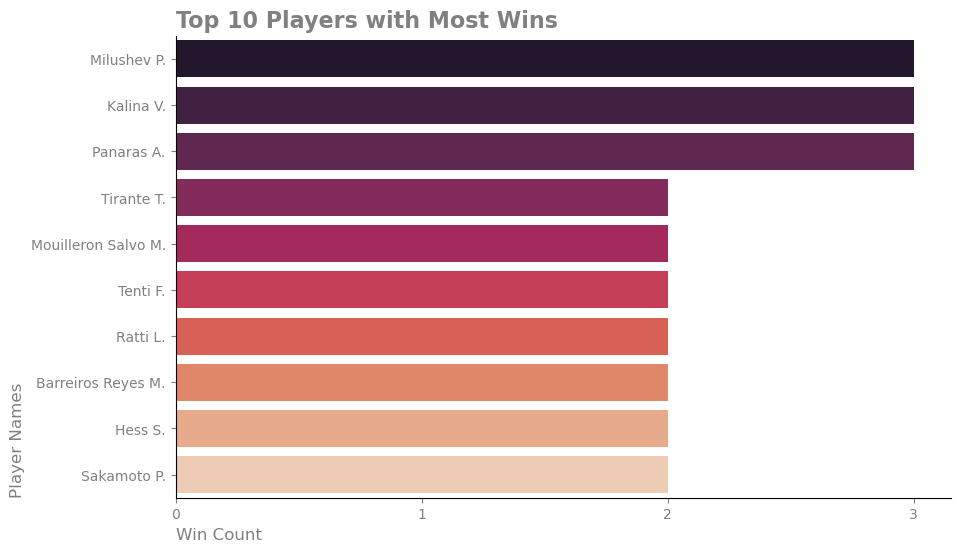

In [5]:
import matplotlib.ticker as ticker

# گرفتن 10 بازیکن برتر از نظر تعداد برد
top_10_players = win_counts.head(10)

# پیدا کردن نام بازیکنان
# ابتدا ادغام لیست بازیکنان تیم خانه و تیم میهمان برای یافتن نام‌ها
all_players = pd.concat([home_team_dataframe[['player_id', 'name']], away_team_dataframe[['player_id', 'name']]]).drop_duplicates()

# ادغام لیست 10 بازیکن برتر با نام‌ها
top_10_players_with_names = top_10_players.reset_index().merge(all_players, on='player_id')

# تنظیم داده‌ها برای نمایش نمودار
top_10_players_with_names = top_10_players_with_names.set_index('name')

# رسم نمودار میله‌ای با استفاده از Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_players_with_names['count'], y=top_10_players_with_names.index, palette="rocket", orient="h")

# تنظیم عنوان و برچسب‌ها
plt.title('Top 10 Players with Most Wins', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Win Count', fontsize=12, color='gray', loc='left')
plt.ylabel('Player Names', fontsize=12, color='gray', loc='bottom')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(colors='gray')
# تنظیم قدم‌های محور ایکس به اعداد صحیح
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# نمایش نمودار
plt.show()


In [6]:
top_10_players_with_names

,player_id,count
name,,
Milushev P.,98951,3
Kalina V.,416491,3
Panaras A.,413166,3
Tirante T.,221515,2
Mouilleron Salvo M.,322053,2
Tenti F.,221015,2
Ratti L.,405124,2
Barreiros Reyes M.,261752,2
Hess S.,303899,2
